In [2]:
using JuMP, Ipopt, Printf, Plots
using TestImages, Images, QuartzImageIO, ImageView

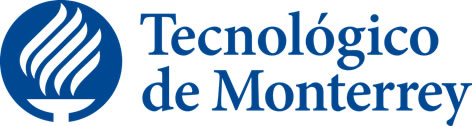

In [15]:
img = load("tec-logo.jpg")

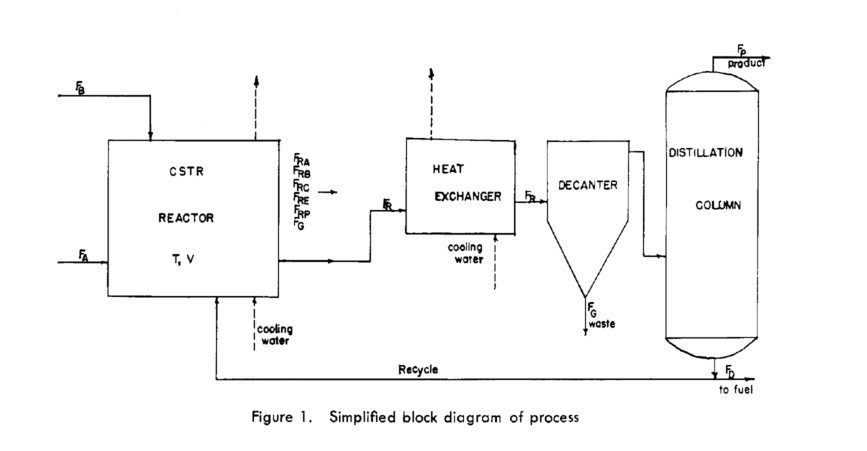

In [16]:
img = load("fig8_wo.png")


### Figure 1 shows a simplified block diagram of the process. The plant is to manufacture 40 million pounds of chemical P per year (4763 lb/hr). The plant consists of a perfectly stirred reactor, a heat exchanger, a decanter, and a distillation column in series. There is recycle from the column reboiler to the reactor. The chemical reaction kinetics are complex. There are three second-order irreversible reactions:

\begin{eqnarray}
A + B &\stackrel{K_1}{\rightarrow}& C\\
C + B &\stackrel{K_2}{\rightarrow}& P+E \\
P + C &\stackrel{K_3}{\rightarrow}& G
\end{eqnarray}

### Reactants A and B are fed separately to the reactor in pure form. Components C and E are intermediates and/or byproducts. They have no sales value but may be disposed of as plant fuel. By-product G is a heavy oil which must be disposed of as a waste material. The reaction coefficients may be expressed in the Arrhenius form:

$$ K_i = A_i e^{\frac{-B_i}{T}},\quad i=1,2,3 $$

### Overall material balance

$$ F_A + F_B - F_G - F_P - F_D = 0 $$

### Distillation column efficiency separation

$$ F_P = F_{RP} -0.1F_{RE}$$

### A component mass balance

$$ \frac{-K_1 F_{RA}F_{RB}\rho V}{F^2_R} - \left( \frac{F_{RA}}{F_R -F_P-F_G} \right) F_D + F_A = 0 $$


### B component mass balance

$$ \left( \frac{-K_1 F_{RA}F_{RB}- K_2 F_{RB}F_{RC}}{F^2_R} \right) \rho V - \left( \frac{F_{RB}}{F_R -F_P-F_G} \right) F_D + F_B = 0 $$

### C component mass balance

$$ \left[ \left(  \frac{M_C}{M_B}  \right)  K_1 F_{RA}F_{RB} -  \left(  \frac{M_C}{M_B}  \right)  K_2 F_{RB}F_{RC} -   K_3 F_{RP}F_{RC} \right] \frac{\rho V}{F^2_R} - \left( \frac{F_{RC}}{F_R -F_P-F_G} \right) F_D = 0 $$

### E component mass balance

$$ \left(  \frac{M_E}{M_B}  \right) \frac{K_2 F_{RB}F_{RC}\rho V}{F^2_R} - \left( \frac{F_{RE}}{F_R -F_P-F_G} \right) F_D = 0 $$

### P component mass balance

$$ \left[ K_2 F_{RB}F_{RC} - \left(  \frac{M_P}{M_C}\right) K_3 F_{RC}F_{RP} \right] \frac{\rho V}{F^2_R} - \left( \frac{F_{RP}-F_{P}}{F_R -F_P-F_G} \right) F_D - F_P = 0 $$ 

### G component mass balance

$$ \left(  \frac{M_G}{M_C}\right) \frac{K_3 F_{RC}F_{RP} \rho V}{F^2_R}  - F_G = 0 $$

### Total output flowrate from CSTR

$$ F_R = F_{RA} + F_{RB} + F_{RC} + F_{RE} + F_{RP} + F_{G}  $$  

### In addition the rate of reaction is negligible below 120 F, and undesirable decomposition occurs above 220  F, so the reactor temperature is constrained  as follows:
 $$  580 \le T \le 680\quad ^o{\rm Rankine} $$ 

### The objective function is expressed as per cent return on investment:

$$ \Omega = 100 \left( \frac{8400(0.3F_P + 0.0068F_D - 0.02F_A- 0.03F_B - 0.01F_G) - 2.22F_R - 0.024(8400)(0.3F_P+0.0068F_D) - 60 \rho V}{600 \rho V}  \right) $$

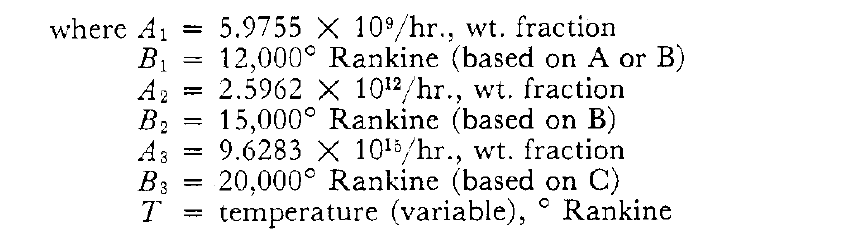

In [26]:
img = load("fig10_wo.png")

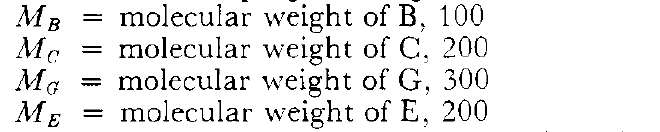

In [27]:
img = load("fig11_wo.png")

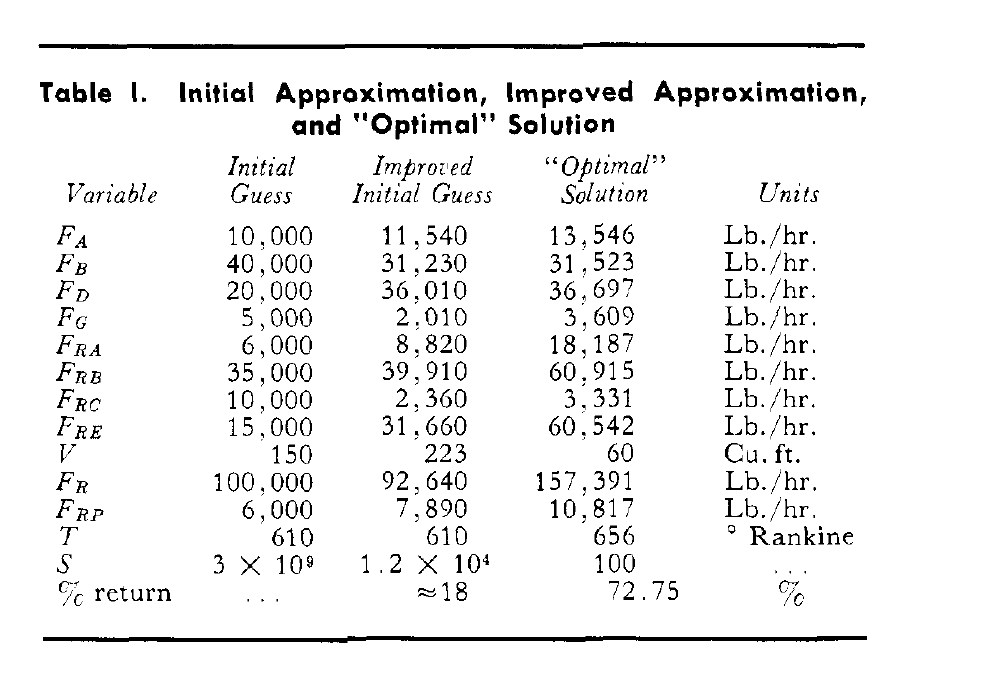

In [23]:
img = load("fig9_wo.png")